In [1]:
import os 
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



path0 = []
path1 = []
path2 = []
path3 = []
path4 = []
path5 = []
path6 = []

# Testing just for brain_bone_window, could combine all windows
for dirname, _, filenames in os.walk('../data/epidural/brain_window'):
    for filename in filenames:
        path0.append(os.path.join(dirname, filename))
    print("Number of type 0: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/intraparenchymal/brain_window'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
    print("Number of type 1: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/intraventricular/brain_window'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
    print("Number of type 2: ", len(filenames))
        
for dirname, _, filenames in os.walk('../data/multi/brain_window'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))  
    print("Number of type 3: ", len(filenames))

for dirname, _, filenames in os.walk('../data/normal/brain_window'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))  
    print("Number of type 4: ", len(filenames))

for dirname, _, filenames in os.walk('../data/subarachnoid/brain_window'):
    for filename in filenames:
        path5.append(os.path.join(dirname, filename))  
    print("Number of type 5: ", len(filenames))

for dirname, _, filenames in os.walk('../data/subdural/brain_window'):
    for filename in filenames:
        path6.append(os.path.join(dirname, filename))  
    print("Number of type 6: ", len(filenames))


import random


data = []
result = []

for index, path in enumerate(path0):
    img = Image.open(path)
    img = ImageOps.grayscale(img) # Removes RGB dimension from image, not sure if this is alright
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(0)
    if index == 10000:
        print(len(data))
        break
        
for index, path in enumerate(path1):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(1) 
    if index == 10000:
        print(len(data))
        break
        
for index, path in enumerate(path2):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(2)
    if index == 10000:
        print(len(data))
        break
        
for index, path in enumerate(path3):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(3)
    if index == 10000:
        print(len(data))
        break

for index, path in enumerate(path4):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(4)
    if index == 10000:
        print(len(data))
        break
        
for index, path in enumerate(path5):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(5)
    if index == 10000:
        print(len(data))
        break

for index, path in enumerate(path6):
    img = Image.open(path)
    img = ImageOps.grayscale(img)
    img = img.resize((100,100))
    img = np.array(img)
    if(img.shape == (100,100)):
        data.append(np.array(img))
        result.append(6)
    if index == 10000:
        print(len(data))
        break

length = len(data)

indices = np.arange(length)
np.random.shuffle(indices)

# Shuffle both arrays using the shuffled indices
shuffled_data = [data[i] for i in indices]
shuffled_result = [result[i] for i in indices]

train_data = shuffled_data[0:int(length*0.5)]
train_result = shuffled_result[0:int(length*0.5)]

# test_data = shuffled_data[int(length*0.8):]
# test_result = shuffled_result[int(length*0.8):]  # FIXME: trying to reduce data so calling fit() doesn't take forever


# test_data = np.array(test_data)
# test_data.shape

# test_result = np.array(test_result)
# test_result.shape


train_data = np.array(train_data)
train_data.shape

train_result = np.array(train_result)
train_result.shape


# Confirm shape of data 
print("train data: ", train_data.shape)
print("train data after reshape: ", train_data.reshape(-1,100*100).shape)


from sklearn.linear_model import LogisticRegression


X = train_data.reshape(train_data.shape[0], -1) 
y = train_result



Number of type 0:  1694
Number of type 1:  15664
Number of type 2:  9878
Number of type 3:  32074
Number of type 4:  6080
Number of type 5:  16423
Number of type 6:  32200
11695
31574
47655
57656
train data:  (28828, 100, 100)
train data after reshape:  (28828, 10000)


In [2]:
import os 
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 100*100))  # Reshape for scaling
X_test_scaled = scaler.transform(X_test.reshape(-1, 100*100))  # Reshape for scaling

# Create and train the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=10000)
logreg.fit(X_train_scaled, y_train)
print("fit complete!")

# Evaluate the model
score = logreg.score(X_test_scaled, y_test)
print("Logistic Regression Score:", score)


fit complete!
Logistic Regression Score: 0.2861107256833634


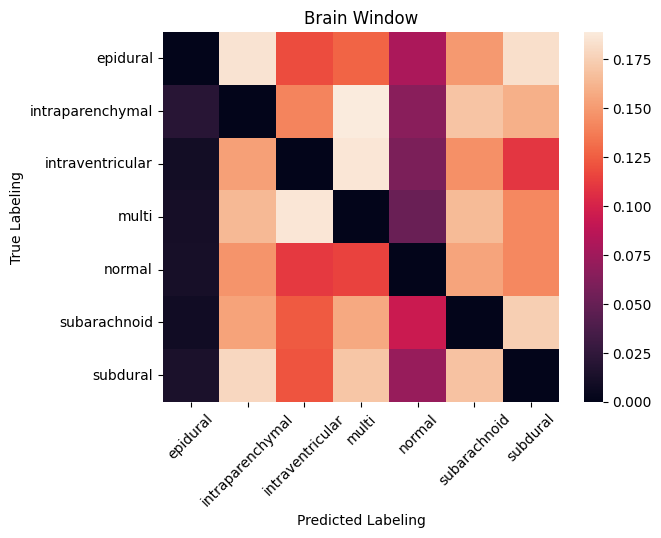

In [6]:
# Generate and save the  confusion matrix heatmap
y_predict = logreg.predict(X_test_scaled)
conf_mx = confusion_matrix(y_test, y_predict)

row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx / row_sum
np.fill_diagonal(nconf_mx, 0)

labels = ['epidural', 'intraparenchymal', 'intraventricular', 'multi', 'normal', 'subarachnoid', 'subdural']
sns.heatmap(nconf_mx, xticklabels=labels, yticklabels=labels)
plt.xticks(rotation=45)
plt.xlabel("Predicted Labeling")
plt.ylabel("True Labeling")
plt.title("Brain Window")

plt.savefig('brain_window.png')

In [4]:
# def downsample(X, y, DS):
#     N = X.shape[0]  # The length of the training data

#     if 123008 / DS % 1 > 0:
#         print("Downsample rate is not a multiple of 123008")
#         DS = 1
#         im_size = 100*100
#     else:
#         im_size = int(100*100 / DS)

#     Xds = np.zeros((N * DS, im_size))
#     yds = np.zeros(N * DS)  # Update to 1D array

#     for n in range(N):
#         for i in range(DS):
#             Xds[n * DS + i, :] = X[n, i::DS]
#             yds[n * DS + i] = y[n]  # Assign directly from y

#     return Xds, yds

In [5]:
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# DS = 2  # downsampling by 2
# X_train_ds, y_train_ds = downsample(X_train, y_train, DS)

# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# logreg.fit(X_train_ds, y_train_ds.ravel())

# score = logreg.score(X_test, y_test)
# print("Logistic Regression Score:", score)
